**Double click here and enter the student numbers for all minigroup members. Don't enter any names.**
1. **21020374**    Xuze Zhang
2. **21010354**    Jianyu Wang

Before you start work on the project, **[click on this link to read the MATH0011 project instructions.](https://www.ucl.ac.uk/~ucahmto/0011/projectinstructions.html)**

# Project 7 - Chebyshev's Bias

This project is about the [prime number theorem](https://en.wikipedia.org/wiki/Prime_number_theorem) and some curious results about the distribution of prime numbers known as Chebyshev's bias.

The prime counting function $\pi(x)$ is defined to be the number of prime number which are less than or equal to $x$.  For example, $\pi(2)=1, \pi(5) = 3, \pi(10) = 4$.  The prime number theorem says that as $x$ grows, $\pi(x)$ is approximately equal to $x / \log(x)$ in the sense that

$$\lim_{x \to \infty}\frac{\pi(x)}{x / \log(x)} = 1$$

(Here and everywhere else in this project, $\log$ means the logarithm to base $e$, sometimes written $\ln$).

In this project you will plot graphs to explore how close $\pi(x)$ is to $x/\log(x)$, explore a better approximation to $\pi(x)$ given by

$$ \operatorname{Li}(x) = \int_2^x \frac{1}{\log(t)} \; \mathrm{d}t,$$

and explore functions counting the number of primes with given remainder on dividing by 6, which behave in a surprising way known as *Chebyshev's bias*.

The next cell imports [`sympy`](https://www.sympy.org/en/index.html) which has a class `ntheory` containing many useful number theoretical functions, as well as some other useful modules.

In [3]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import math

## Part 0 (no marks)

Look through [the online documentation for `sympy.ntheory`](https://docs.sympy.org/latest/modules/ntheory.html). You don't need to understand it in detail, but you will find functions there that are useful for this project.  Since we've imported sympy as `sp`, you can call `ntheory` functions like this:

In [4]:
print(sp.ntheory.isprime(3))
print(sp.ntheory.isprime(4))
print(sp.ntheory.isprime(1111111111111111111))

True
False
True


## Part 1

In this exercise you will produce some plots that illustrate the prime number theorem (PNT).

First **plot $\pi(x)$ and $x/\log(x)$ on the *same* axis, for $10 \leq x \leq 10000$.**  

Next, **on a different axis,** plot

$$ y = \frac{\pi(x)}{x / \log(x)} $$

for $10 \leq x \leq 10000$. The Prime Number Theorem says that this quantity tends to 1 as $x \to \infty$.

The function $\pi(x)$ can be imported from the `sympy.ntheory` module.

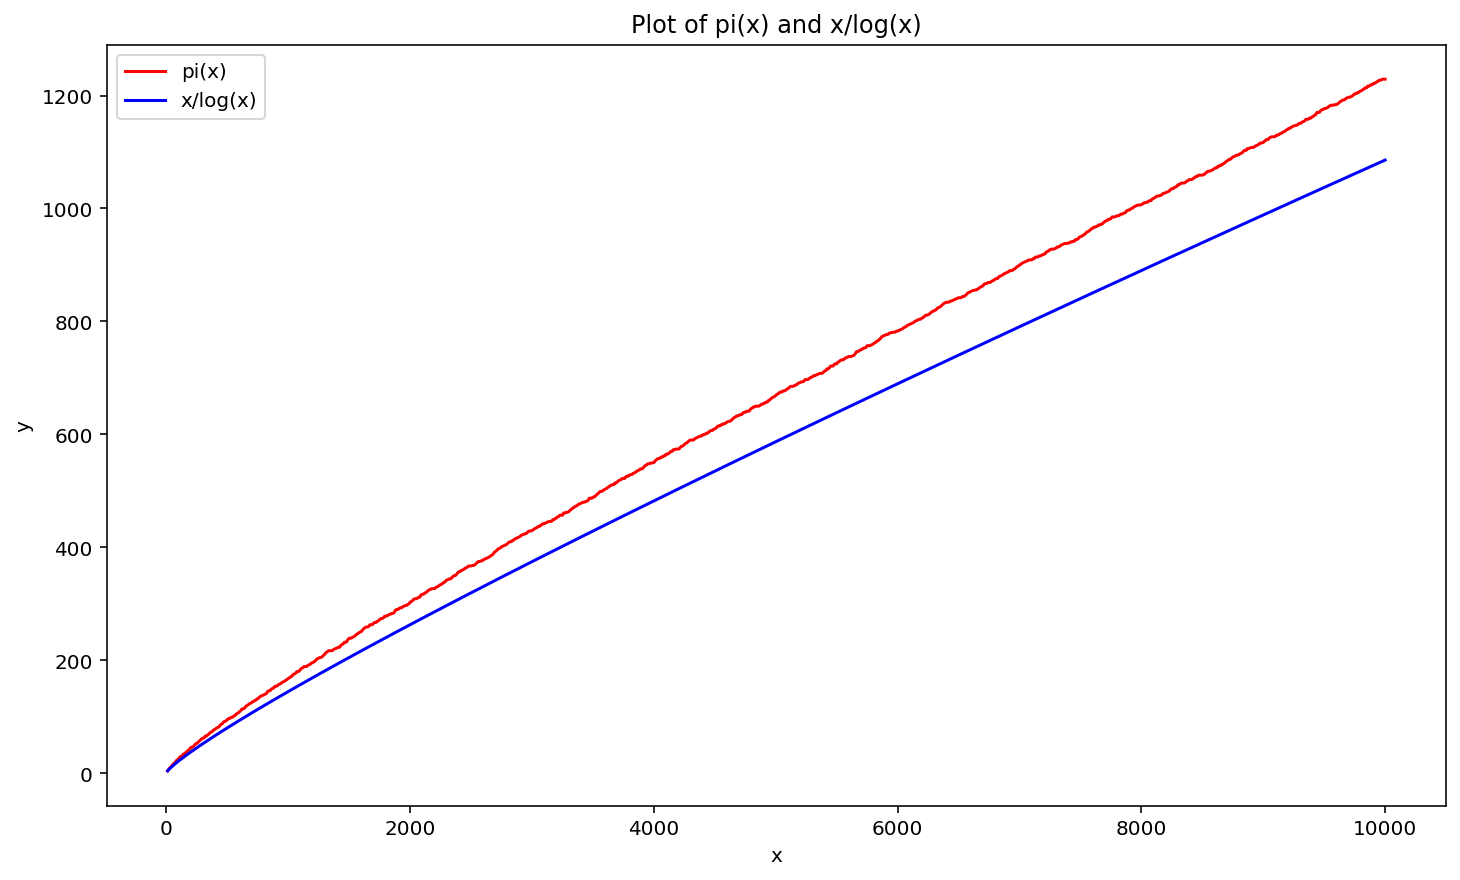

In [14]:
xs = np.linspace(10, 10000, 1000) # create 1000 points between 10 and 10000
pi_x = [sp.primepi(x) for x in xs] # counting the number of prime numbers less than every x
func = [x / np.log(x) for x in xs] # compute x/log(x)

plt.plot(xs, pi_x, 'r') # plot the pi(x) in red
plt.plot(xs, func, 'b') # plot x/log(x) in blue
plt.title('Plot of pi(x) and x/log(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['pi(x)', 'x/log(x)'])
plt.show()





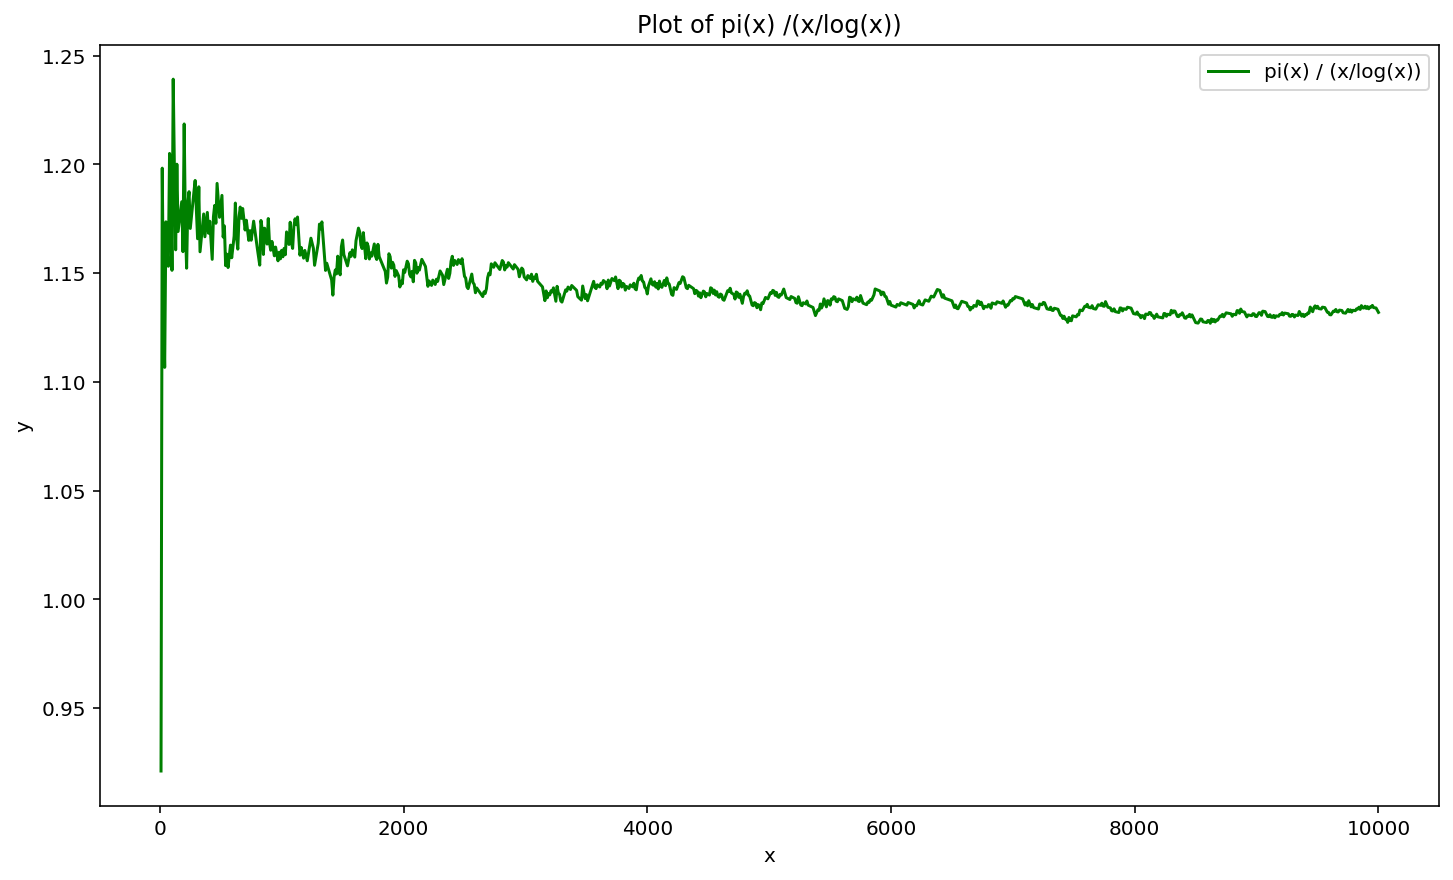

In [15]:
ys = [pi_x[i] / func[i] for i in range(len(pi_x))] # compute y by pi(x) / (x / log(x))
plt.plot(xs, ys, 'g') # plot ys in green
plt.title('Plot of pi(x) /(x/log(x))')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['pi(x) / (x/log(x))'])
plt.show()



## Part 2

Simpson's rule is a way of approximating the value of the integral $\int_a ^b f(x) \; \mathrm{d}x$. 
The Simpson's rule approximation using $2N+1$ equally spaced points is
$$ \frac{b-a}{6N} \left( f(x_0) + 4f(x_1) + 2f(x_2)+4f(x_3)+2f(x_4)+\cdots +2f(x_{2N-2})+ 4f(x_{2N-1}) + f(x_{2N}) \right)$$
where $x_i = a + \frac{b-a}{2N}i$ (in other words, the $x_i$ are $2N+1$ evenly spaced points starting at $a$ and ending at $b$).

Write a function `simpson(f, a, b, N)` which outputs this approximation to $\int_a^b f(x) \; \mathrm{d}x$.
**You are asked to implement the rule yourself - don't import a function to do it for you.**  You could test your function by checking it gives a good approximation to $\int_0^1 x^2\; \mathrm{d}x$ or some other integrals for which you can work out the exact answer.


When you've done this, 
 - **plot a graph of $y=\pi(x)$ for** $10 \leq x \leq 10000$, and
 - **on the same axis plot $y=$ the Simpson's rule approximation to $\operatorname{Li}(x)$ (as defined above) using $N=250$.**

In [16]:
def simpson(f, a, b, N):
    delta = (b - a) / (2 * N) # compute the distance between x_i and x_i+1
    res = 0
    for i in range(N):
        x_i = a + 2 * i * delta # update x_i
        res += (f(x_i) + 4 * f(x_i + delta) + f(x_i + delta * 2)) # update res (the result in the brackets)

    return (delta * res) / 3

In [17]:
simpson(lambda x: x ** 2, 0, 1, 100) # a test (the function is x ** 2 and the interval is [0, 1])

0.3333333333333334

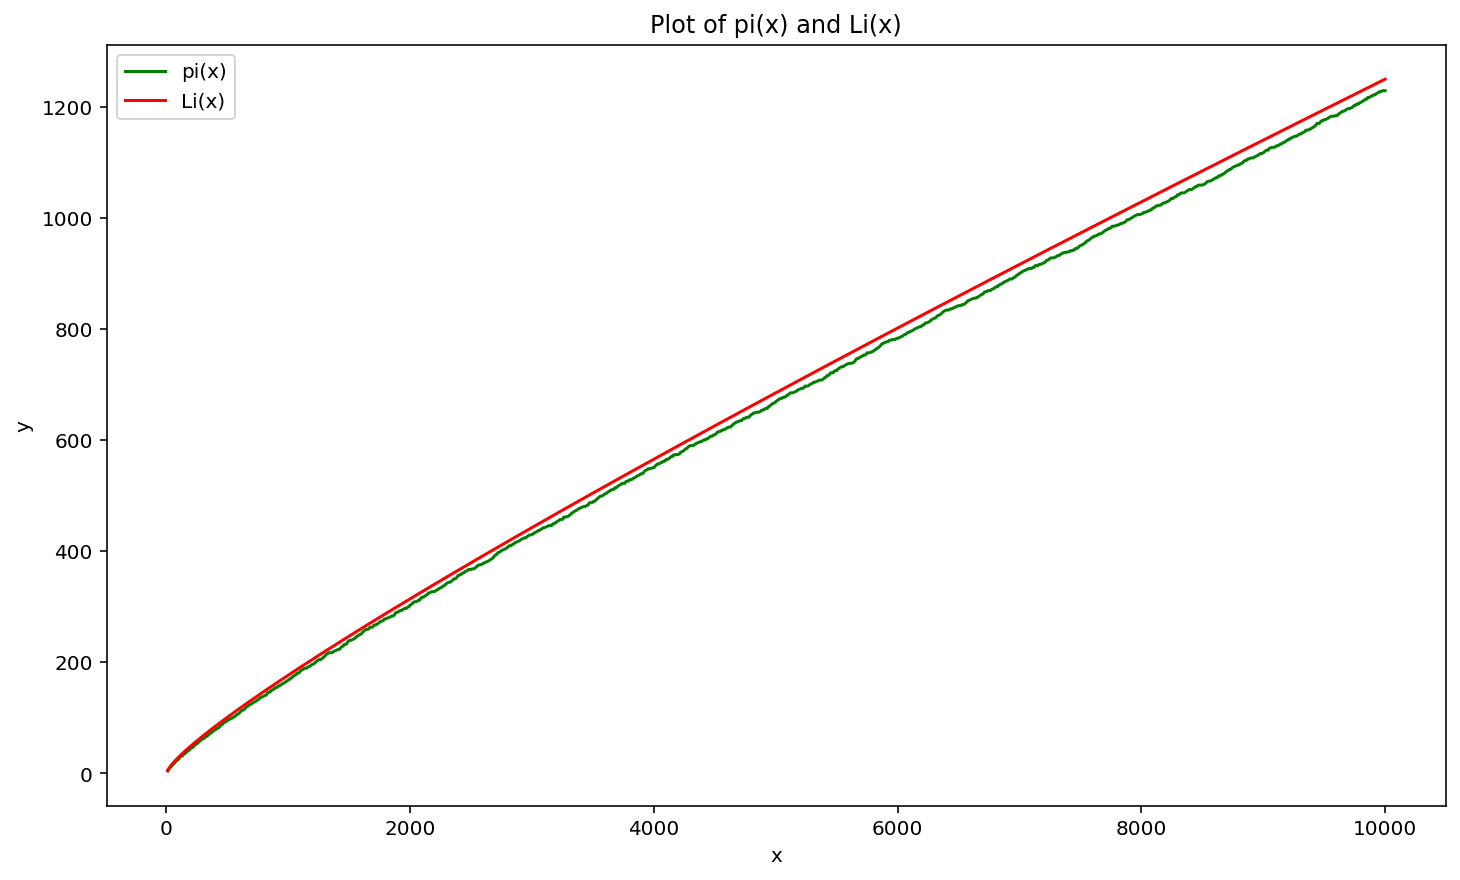

In [18]:
xs = np.linspace(10, 10000, 1000) # create 1000 points between 10 and 10000
pi_x = [sp.primepi(x) for x in xs] # counting the number of prime numbers less than every x
li_x = [simpson(lambda x: 1 / np.log(x), 2, x, 250) for x in xs] # compute every li_x

plt.plot(xs, pi_x, 'g') # plot the pi(x) in green
plt.plot(xs, li_x, 'r') # plot the li(x) in red
plt.title('Plot of pi(x) and Li(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['pi(x)', 'Li(x)'])
plt.show()

## Part 3

Define $\pi_{6,1}(x)$ to be the number of primes less than or equal to $x$ which have remainder 1 when you divide by 6 (that is, the number of primes $\leq x$ which can be written as $6k+1$ for some whole number $k$).  Similarly define $\pi_{6,5}(x)$ to be the number of primes $\leq x$ which leave remainder 5 when you divide by 6.

For example
- $\pi_{6,1}(20) = 3$ as the primes $\leq 20$ which have remainder 1 when you divide by 6 are 7, 13, and 19.
- $\pi_{6,5}(20)=3$ as the primes $\leq 20$ which have remainder 5 when you divide by 6 are 5, 11, and 17.

**Write functions `pi61(x)` and `pi65(x)` which compute $\pi_{6,1}(x)$ and $\pi_{6,5}(x)$ respectively.**

In [19]:
def pi61(x):
    temp = list(sp.primerange(2,x + 1)) # find all prime numbers less than or equal x
    res = sum([1 for num in temp if num % 6 == 1]) # the number of prime numbers which have remainder 1 divided by 6
    return res

pi61(20)

3

In [20]:
def pi65(x):
    temp = list(sp.primerange(2,x + 1)) # find all prime numbers less than or equal x
    res = sum([1 for num in temp if num % 6 == 5]) # the number of prime numbers which have remainder 1 divided by 6
    return res

pi65(20)

3

## Part 4

Every prime number greater than 3 has remainder 1 or 5 when you divide by 6, and there is no obvious reason why either 1 or 5 should happen more frequently than the other.  However, it turns out that primes with remainder 5 happen slightly more often - this is called *Chebyshev's bias* after the Russian mathematician who discovered it.

**Plot `pi61(x)` and `pi65(x)` on the same axes, for $10 \leq x \leq 10000$.**  You should see Chebyshev's bias in action.

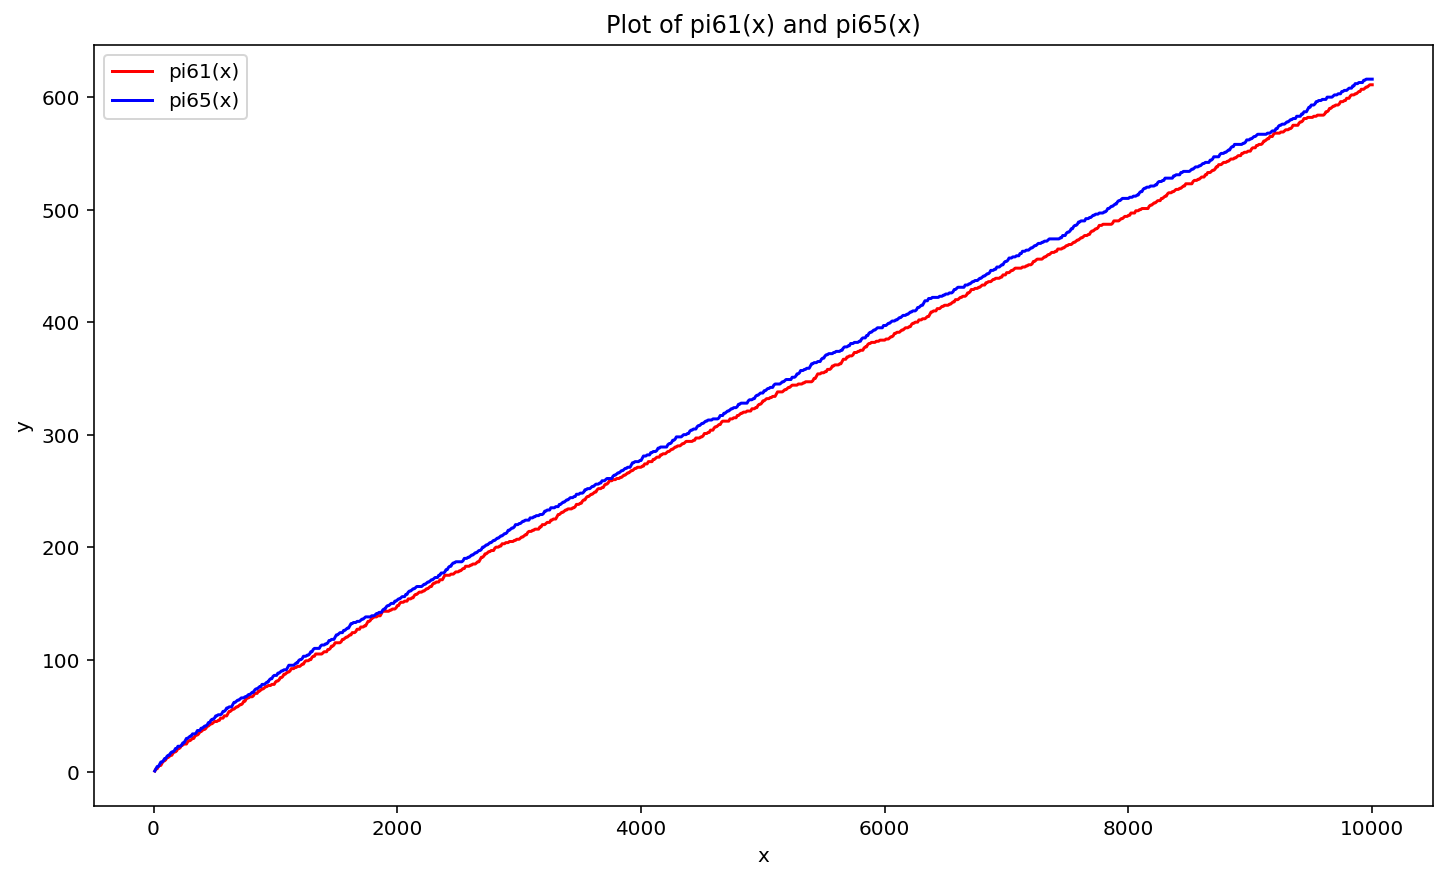

In [21]:
xs = np.linspace(10, 10000, 1000) # create 1000 points between 10 and 10000
pi61s = [pi61(x) for x in xs] # compute pi61(x)
pi65s = [pi65(x) for x in xs] # compute pi65(x)

plt.plot(xs, pi61s, 'r') # plot the pi61(x) in red
plt.plot(xs, pi65s, 'b') # plot the pi65(x) in blue
plt.title('Plot of pi61(x) and pi65(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['pi61(x)', 'pi65(x)'])
plt.show()

# Submitting your project

Have you done all of the following things?

0. Included **all** minigroup members' student numbers at the top of this notebook.
1. Read through every exercise to check you have answered every part.
1. Carefully read and followed all of the [MATH0011 project instructions](https://www.ucl.ac.uk/~ucahmto/0011/projectinstructions.html).
2. Checked that all of the code in this notebook works correctly.

If you have, you're ready to submit.  One minigroup member only should download the completed notebook (in CoCalc, click the File menu next to the green Save button, then click Download) and submit it on the MATH0011 Moodle.  Please submit **only one file per minigroup.**